# Neurons and Layers
In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.
<figure>
   <img src="./images/C2_W1_NeuronsAndLayers.png"  style="width:540px;height:200px;" >
</figure>


## Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear Model

### DataSet
We'll use an example on house prices.

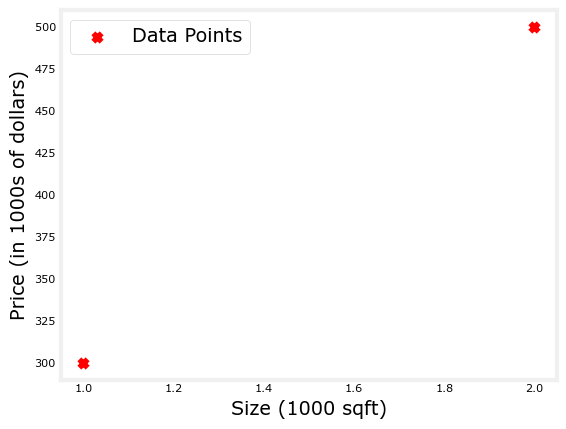

In [156]:
# Define the training data
X_train = np.array([[1.0], [2.0]], dtype=np.float32)  # Size in 1000 square feet
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  # Price in 1000s of dollars

# Create a scatter plot
plt.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")

# Add labels and legend
plt.legend(fontsize='xx-large')
plt.ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
plt.xlabel('Size (1000 sqft)', fontsize='xx-large')

# Display the plot
plt.show()

### Regression/Linear Model 
The function implemented by a neuron with no activation, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [222]:
linear_layer = tf.keras.layers.Dense(units = 1,activation = "linear") 

Let's examine the weights.

In [225]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [166]:
a1 = linear_layer(X_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.51]], dtype=float32)>

The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [169]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.51]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [172]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])## set_weights takes a list of numpy arrays
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [175]:
#tensorflow model
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
#numpy model
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [178]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

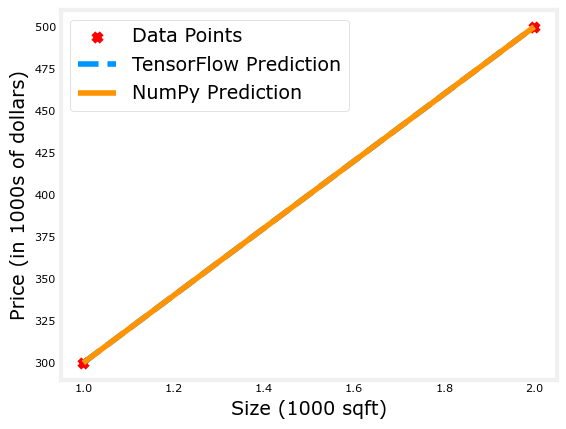

In [180]:
#plt_linear(X_train, Y_train, prediction_tf, prediction_np)
# Function to plot the data and predictions
def plt_linear(X_train, Y_train, prediction_tf,prediction_np ):
    plt.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    plt.plot(X_train,prediction_tf, label="TensorFlow Prediction", linestyle='--')
    plt.plot(X_train,prediction_np, label="NumPy Prediction", linestyle='-')
    plt.legend(fontsize='xx-large')
    plt.ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    plt.xlabel('Size (1000 sqft)', fontsize='xx-large')
    plt.show()

# Call the plotting function
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

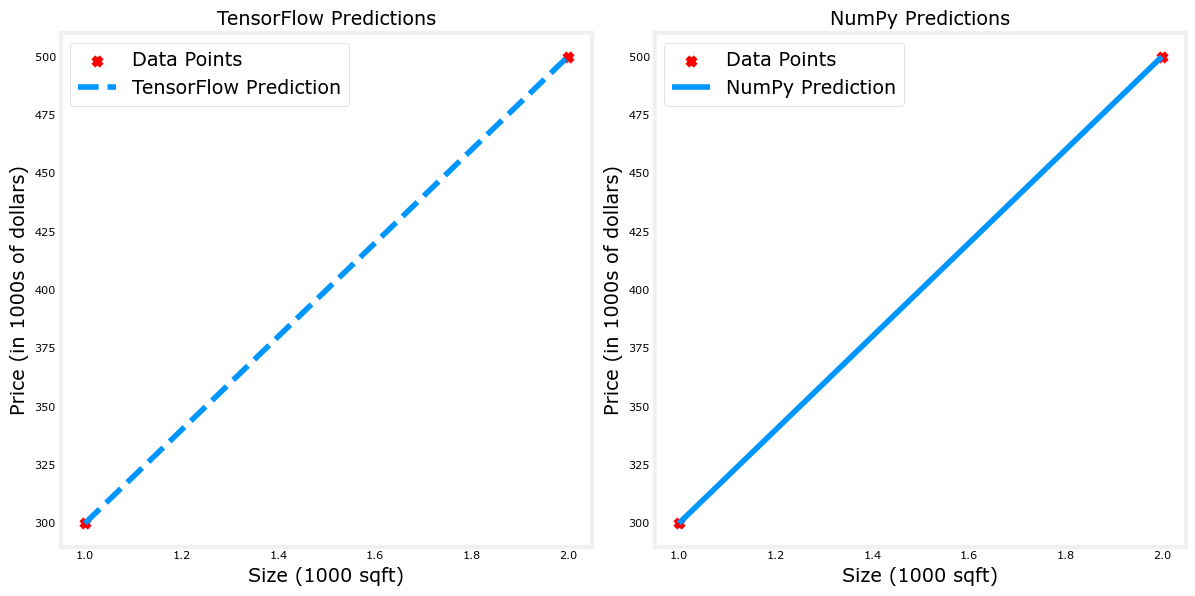

In [182]:
# both predictions in 2 subplots not in same
# Function to plot the data and predictions in two separate plots
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot TensorFlow predictions
    axes[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    axes[0].plot(X_train, prediction_tf, label="TensorFlow Prediction", linestyle='--')
    axes[0].legend(fontsize='xx-large')
    axes[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    axes[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    axes[0].set_title('TensorFlow Predictions', fontsize='xx-large')

    # Plot NumPy predictions
    axes[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    axes[1].plot(X_train, prediction_np, label="NumPy Prediction", linestyle='-')
    axes[1].legend(fontsize='xx-large')
    axes[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    axes[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    axes[1].set_title('NumPy Predictions', fontsize='xx-large')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation


### DataSet


In [186]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

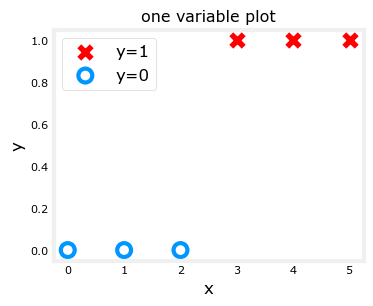

In [188]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

#ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [201]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim= 1, activation = "sigmoid", name="L1")
    ]
)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [204]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [206]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.8]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values.

In [209]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [211]:
def sigmoidnp(z):
    return 1 / (1 + np.exp(-z))

Let's compare equation (2) to the layer output.

In [214]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
[[0.01]]
[[0.01]]


They produce the same values!
Now, we can use our logistic layer and NumPy model to make predictions on our training data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

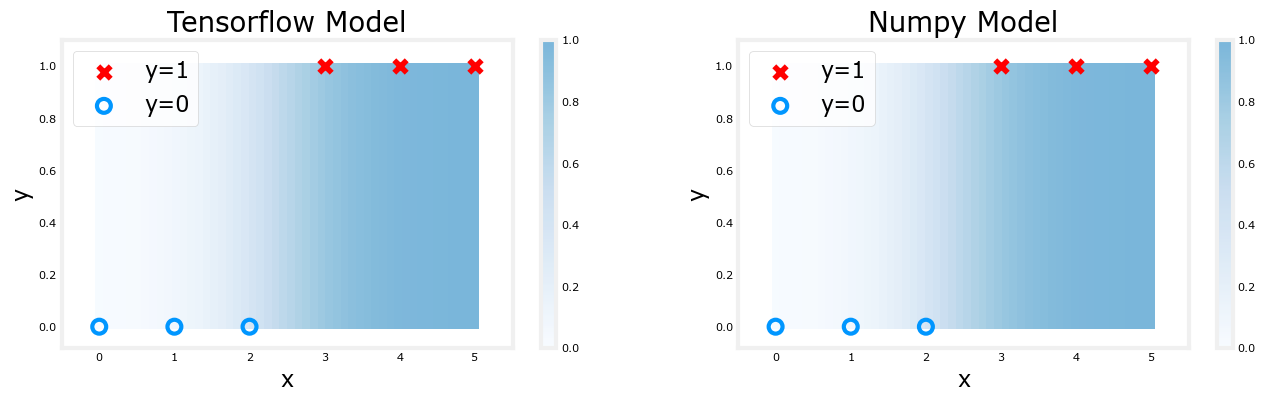

In [217]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

The shading above reflects the output of the sigmoid which varies from 0 to 1.

# Simple Neural Network
In this lab we will build a small neural network using Tensorflow.
   <center> <img  src="./images/C2_W1_CoffeeRoasting.png" width="400" />   <center/>


In [65]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Dataset

In [68]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as temperature rises, the duration should shrink. 

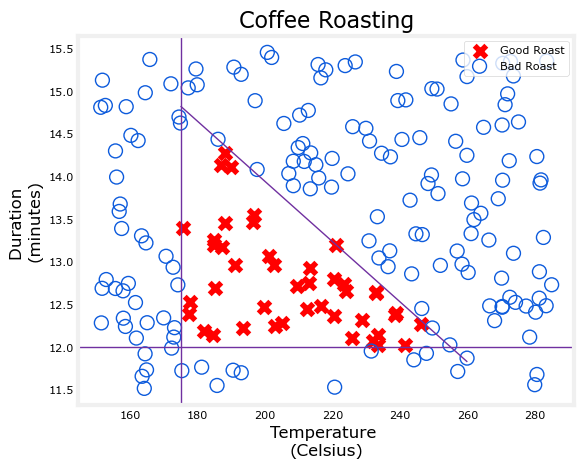

In [71]:
plt_roast(X,Y)

### Normalize Data \).



In [74]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [76]:
Xn

<tf.Tensor: shape=(200, 2), dtype=float32, numpy=
array([[-0.83, -0.65],
       [ 1.03, -1.39],
       [ 0.31,  0.87],
       [-1.08, -1.52],
       [-0.79,  0.62],
       [ 0.18, -1.18],
       [-0.26,  0.66],
       [-0.29,  0.53],
       [ 1.55,  0.71],
       [-0.4 , -1.05],
       [-0.55,  0.1 ],
       [ 1.29,  1.04],
       [-0.64,  1.57],
       [-0.13,  0.75],
       [-1.36, -1.34],
       [-1.04,  1.42],
       [ 0.58,  1.3 ],
       [ 0.46, -0.27],
       [ 0.03,  0.39],
       [ 1.19, -0.16],
       [ 1.3 ,  0.46],
       [ 1.08,  0.05],
       [ 0.62, -0.51],
       [ 0.05, -0.94],
       [-1.38, -1.57],
       [ 0.65, -0.09],
       [ 1.31,  1.25],
       [-0.42,  1.74],
       [ 0.28,  1.  ],
       [-0.34, -1.02],
       [-1.14, -1.07],
       [ 0.32, -1.31],
       [-1.65,  1.24],
       [-1.38, -0.11],
       [-0.07,  0.49],
       [-0.02,  1.61],
       [ 0.82,  0.33],
       [ 0.37,  0.08],
       [ 1.54, -0.91],
       [ 0.61,  0.26],
       [-1.58, -0.66],
       

Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [79]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape) 

(200000, 2) (200000, 1)


In [81]:
Xt

array([[-0.83, -0.65],
       [ 1.03, -1.39],
       [ 0.31,  0.87],
       ...,
       [ 1.38, -0.3 ],
       [ 0.05, -0.56],
       [ 1.66, -0.62]], dtype=float32)

## Tensorflow Model

### Model
   <center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations as shown below:

In [85]:
# Define layers
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)
#model.summary()

>**Note 1:** The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point.  This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the `model.fit` statement.  
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability. This will be described in more detail in a later lab.

The `model.summary()` provides a description of the network:

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [89]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [92]:
# get model weights through getting layers
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.71 -0.2  -0.43]
 [ 0.2  -0.2  -0.8 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.05]
 [ 0.29]
 [-1.08]] 
b2(1,): [0.]


The following statements will be described in detail in Week2. For now:
- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [95]:
#model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)
#model.fit
model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2594
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1324
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1194
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0774
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0200
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0125
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0087
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0062
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0045
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0032


#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 6s 910us/step - loss: 0.1782
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

#### Updated Weights
After fitting, the weights have been updated: 

In [99]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-9.12e-03 -1.74e+01 -1.05e+01]
 [-8.57e+00 -1.46e+01 -1.82e-01]] 
b1: [-10.72  -2.59 -11.49]
W2:
 [[-42.09]
 [ 33.09]
 [-46.36]] 
b2: [-9.03]


### Predictions
<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Once you have a trained model, you can then use it to make predictions. Recall that the output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

In [102]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
predictions = 
 [[9.59e-01]
 [1.16e-04]]


To convert the probabilities to a decision, we apply a threshold:

In [105]:
# Apply threshold to set the prob to 0 or 1
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


This can be accomplished more succinctly:

In [108]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


#### Congratulations!
You have built a small neural network in Tensorflow. 
The network demonstrated the ability of neural networks to handle complex decisions by dividing the decisions between multiple units.

# Simple Neural Network_b
In this lab, we will build a small neural network using Numpy. It will be the same "coffee roasting" network you implemented in Tensorflow.
   <center> <img  src="./images/C2_W1_CoffeeRoasting.png" width="400" />   <center/>

In [112]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## DataSet
This is the same data set as the previous lab.

In [115]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as the temperature rises, the duration should shrink. 

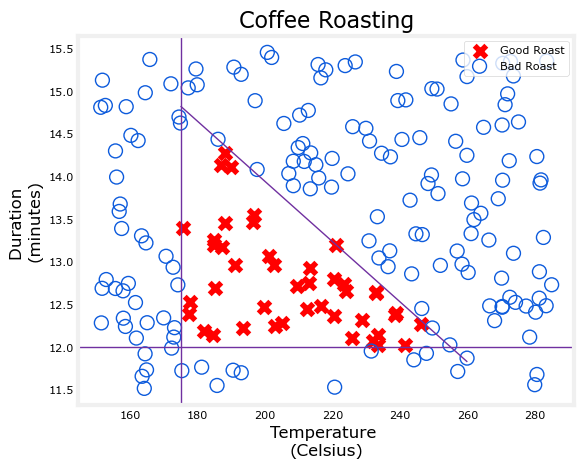

In [118]:
plt_roast(X,Y)

### Normalize Data
To match the previous lab, we'll normalize the data. Refer to that lab for more details

In [121]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


## Numpy Model (Forward Prop in NumPy)
<center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations.

As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense2.PNG" width="600" height="450">

In the first optional lab, you constructed a neuron in NumPy and in Tensorflow and noted their similarity. A layer simply contains multiple neurons/units. As described in lecture, one can utilize a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` can then be applied to that result. Let's try that below to build a "dense layer" subroutine.

In [125]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    #
    for j in range(units):               
        w = W[:,j]                                    
        z = np.dot(w, a_in) + b[j]         
        a_out[j] = g(z)               
    return (a_out)
    #

The following cell builds a two-layer neural network utilizing the `my_dense` subroutine above.

In [129]:
def my_sequential(x, W1, b1, W2, b2):
    """
        Computes the sequential neural network
        Args:
          x   (ndarray (n, ))  : Data, 1 example 
          W1  (ndarray (n, j)) : Weight matrix, n features per unit, j units in layer 1
          b1  (ndarray (j, )) : Bias vector, j units in layer 1  
          W2  (ndarray (j, k)) : Weight matrix, j features per unit, k units in layer 2
          b2  (ndarray (k, )) : Bias vector, k units in layer 2
        Returns:
          a2 (ndarray (k, )) : Output activations of k units in layer 2
    """
    #
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    return (a2)
    #

We can copy trained weights and biases from the previous lab in Tensorflow.

In [132]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

### Predictions
<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Once you have a trained model, you can then use it to make predictions. Recall that the output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

Let's start by writing a routine similar to Tensorflow's `model.predict()`. This will take a matrix $X$ with all $m$ examples in the rows and make a prediction by running the model.

In [136]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return(p)

We can try this routine on two examples:

In [139]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

C:\Users\faizr\AppData\Local\Temp\ipykernel_14504\3168763570.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = my_sequential(X[i], W1, b1, W2, b2)


To convert the probabilities to a decision, we apply a threshold:

In [142]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [144]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## Network function

his graph shows the operation of the whole network and is identical to the Tensorflow result from the previous lab.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  

C:\Users\faizr\AppData\Local\Temp\ipykernel_14504\3168763570.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = my_sequential(X[i], W1, b1, W2, b2)


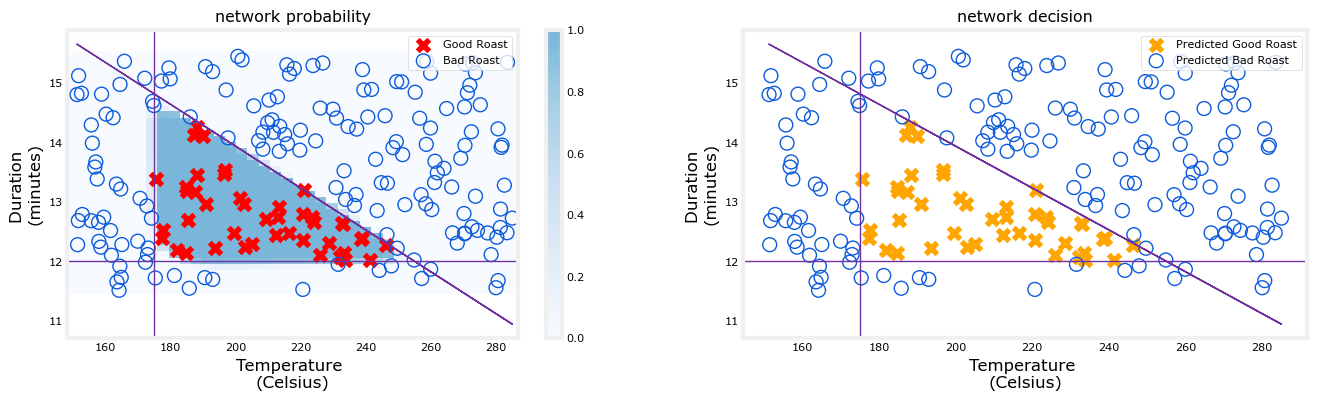

In [148]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)